# Signal around ZEB instances

In [25]:
library(rtracklayer)
library(GenomicRanges)
library(ggplot2)

In [8]:
zeb_hits = read.table("../20210322_BPNet_synthetic/data/20201211_gridmap_peakwidthnorm_logplusznorm_4way_ordered_n20/ZEB.cluster_idx5.bed")[,1:3]
colnames(zeb_hits) = c("chr", "start", "end")
zeb_hits = GRanges(zeb_hits)

zeb_hits

GRanges object with 6686 ranges and 0 metadata columns:
         seqnames              ranges strand
            <Rle>           <IRanges>  <Rle>
     [1]     chr1       858753-858759      *
     [2]     chr1     1013591-1013597      *
     [3]     chr1     1059779-1059785      *
     [4]     chr1     1064398-1064404      *
     [5]     chr1     1218113-1218119      *
     ...      ...                 ...    ...
  [6682]     chrX 155216545-155216551      *
  [6683]     chrX 155612788-155612794      *
  [6684]     chrX 155881445-155881451      *
  [6685]     chrY     7719543-7719549      *
  [6686]     chrY   19016004-19016010      *
  -------
  seqinfo: 24 sequences from an unspecified genome; no seqlengths

In [94]:
zeb_fibr_ipsc_hits = read.table("../20210322_BPNet_synthetic/data/20201211_gridmap_peakwidthnorm_logplusznorm_4way_ordered_n20/ZEB.cluster_idx5.and.cluster_idx16.bed")[,1:3]
colnames(zeb_fibr_ipsc_hits) = c("chr", "start", "end")
zeb_fibr_ipsc_hits = GRanges(zeb_fibr_ipsc_hits)

zeb_fibr_ipsc_hits

GRanges object with 4460 ranges and 0 metadata columns:
         seqnames              ranges strand
            <Rle>           <IRanges>  <Rle>
     [1]     chr1       858753-858759      *
     [2]     chr1     1013591-1013597      *
     [3]     chr1     1059779-1059785      *
     [4]     chr1     1064398-1064404      *
     [5]     chr1     1471164-1471170      *
     ...      ...                 ...    ...
  [4456]     chrX 154490590-154490596      *
  [4457]     chrX 155094683-155094689      *
  [4458]     chrX 155216545-155216551      *
  [4459]     chrX 155612788-155612794      *
  [4460]     chrX 155881445-155881451      *
  -------
  seqinfo: 23 sequences from an unspecified genome; no seqlengths

In [32]:
ap1_hits = read.table("../20210322_BPNet_synthetic/data/20201211_gridmap_peakwidthnorm_logplusznorm_4way_ordered_n20/FOS_MA0476.1.cluster_idx5.bed")[,1:3]
colnames(ap1_hits) = c("chr", "start", "end")
ap1_hits = GRanges(ap1_hits)

ap1_hits

GRanges object with 7266 ranges and 0 metadata columns:
         seqnames            ranges strand
            <Rle>         <IRanges>  <Rle>
     [1]     chr1     944861-944869      *
     [2]     chr1   5938815-5938823      *
     [3]     chr1   5983654-5983662      *
     [4]     chr1   6603045-6603053      *
     [5]     chr1   6800952-6800960      *
     ...      ...               ...    ...
  [7262]     chrY 12552730-12552738      *
  [7263]     chrY 12710390-12710398      *
  [7264]     chrY 14798174-14798182      *
  [7265]     chrY 14802323-14802331      *
  [7266]     chrY 18858743-18858751      *
  -------
  seqinfo: 24 sequences from an unspecified genome; no seqlengths

In [55]:
tead_hits = read.table("../20210322_BPNet_synthetic/data/20201211_gridmap_peakwidthnorm_logplusznorm_4way_ordered_n20/TEAD1_TEA_2.cluster_idx5.bed")[,1:3]
colnames(tead_hits) = c("chr", "start", "end")
tead_hits = GRanges(tead_hits)

tead_hits

GRanges object with 1209 ranges and 0 metadata columns:
         seqnames              ranges strand
            <Rle>           <IRanges>  <Rle>
     [1]     chr1     1859512-1859525      *
     [2]     chr1   12610775-12610788      *
     [3]     chr1   17587815-17587828      *
     [4]     chr1   17696598-17696611      *
     [5]     chr1   18817029-18817042      *
     ...      ...                 ...    ...
  [1205]     chrX 119565638-119565651      *
  [1206]     chrX 119763342-119763355      *
  [1207]     chrX 130682710-130682723      *
  [1208]     chrX 135295909-135295922      *
  [1209]     chrX 152897934-152897947      *
  -------
  seqinfo: 23 sequences from an unspecified genome; no seqlengths

In [9]:
get_matrix_from_bigwig <- function(bigwig_path, peak_set) {
    # ensure peak set has fixed width
    stopifnot(length(unique(width(peak_set)))==1)
    
    as.matrix(import(bigwig_path, 
      which=peak_set, as="NumericList"))
}

In [85]:
zeb_insertions = get_matrix_from_bigwig("~/oak/projects/scATAC-reprog/clusters/20201020_n62402/bigwigs/cluster_idx5.bw",
                                    resize(zeb_hits, width = 500, fix = "center"))

In [95]:
zeb_insertions_ipsc = get_matrix_from_bigwig("~/oak/projects/scATAC-reprog/clusters/20201020_n62402/bigwigs/cluster_idx16.bw",
                                    resize(zeb_fibr_ipsc_hits, width = 500, fix = "center"))

In [34]:
ap1_insertions = get_matrix_from_bigwig("~/oak/projects/scATAC-reprog/clusters/20201020_n62402/bigwigs/cluster_idx5.bw",
                                    resize(ap1_hits, width = 500, fix = "center"))

In [56]:
tead_insertions = get_matrix_from_bigwig("~/oak/projects/scATAC-reprog/clusters/20201020_n62402/bigwigs/cluster_idx5.bw",
                                    resize(tead_hits, width = 500, fix = "center"))

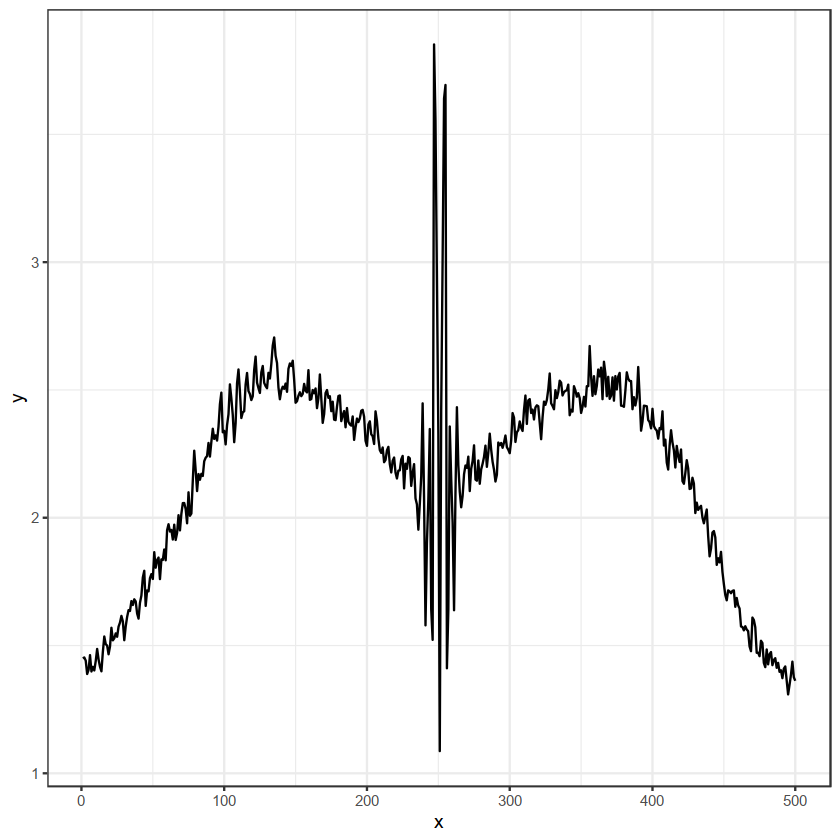

In [86]:
ggplot(data.frame(x=seq(500), 
                  y=colMeans(zeb_insertions))) +
geom_line(aes(x=x,y=y)) +
theme_bw()

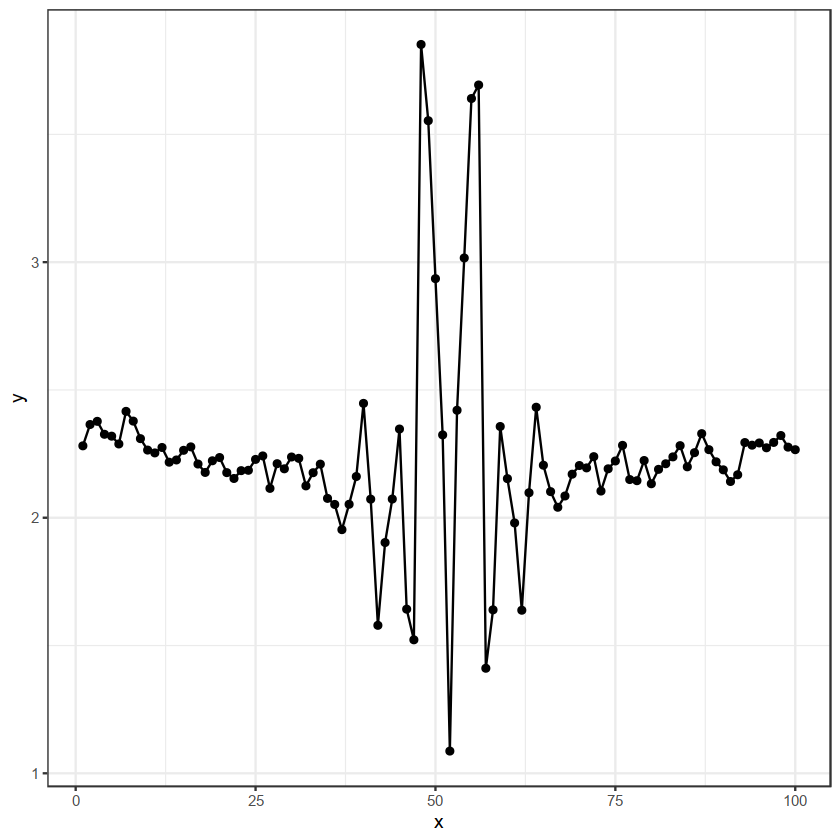

In [46]:
ggplot(data.frame(x=seq(100), 
                  y=colMeans(zeb_insertions)[200:299])) +
geom_point(aes(x=x,y=y)) +
geom_line(aes(x=x,y=y))+
theme_bw()

In [89]:
zeb_insertions_smc = get_matrix_from_bigwig("~/oak/projects/SMC_ZEB_KD_TomQ/bigwigs/control.bw",
                                    resize(zeb_fibr_ipsc_hits, width = 500, fix = "center"))

In [91]:
zeb_insertions_smc_kd = get_matrix_from_bigwig("~/oak/projects/SMC_ZEB_KD_TomQ/bigwigs/kd.bw",
                                    resize(zeb_fibr_ipsc_hits, width = 500, fix = "center"))

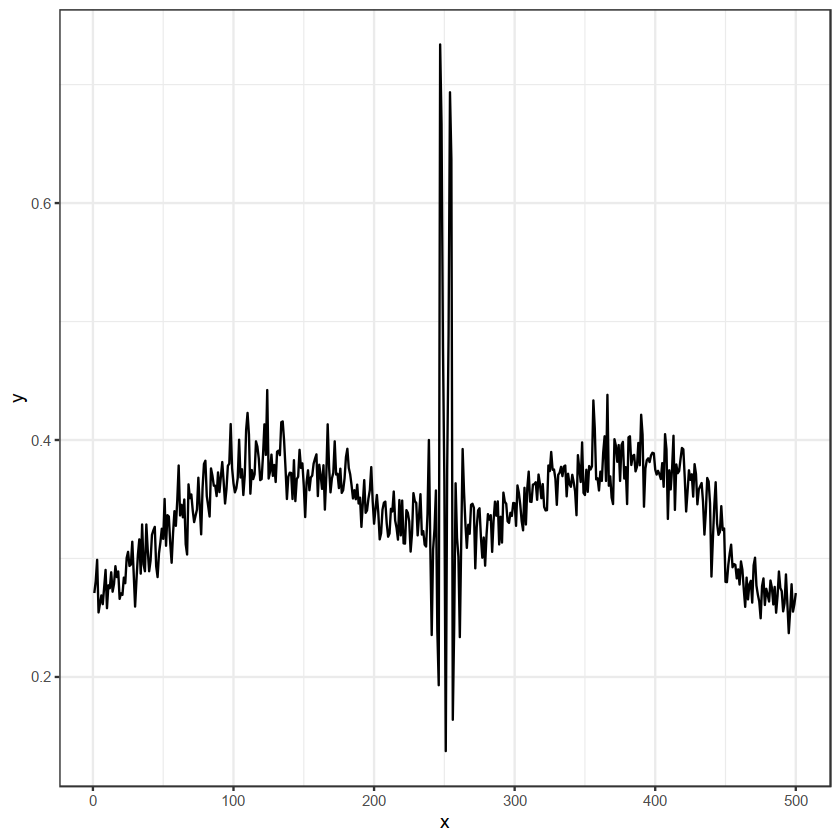

In [90]:
ggplot(data.frame(x=seq(500), 
                  y=colMeans(zeb_insertions_smc))) +
geom_line(aes(x=x,y=y)) +
theme_bw()

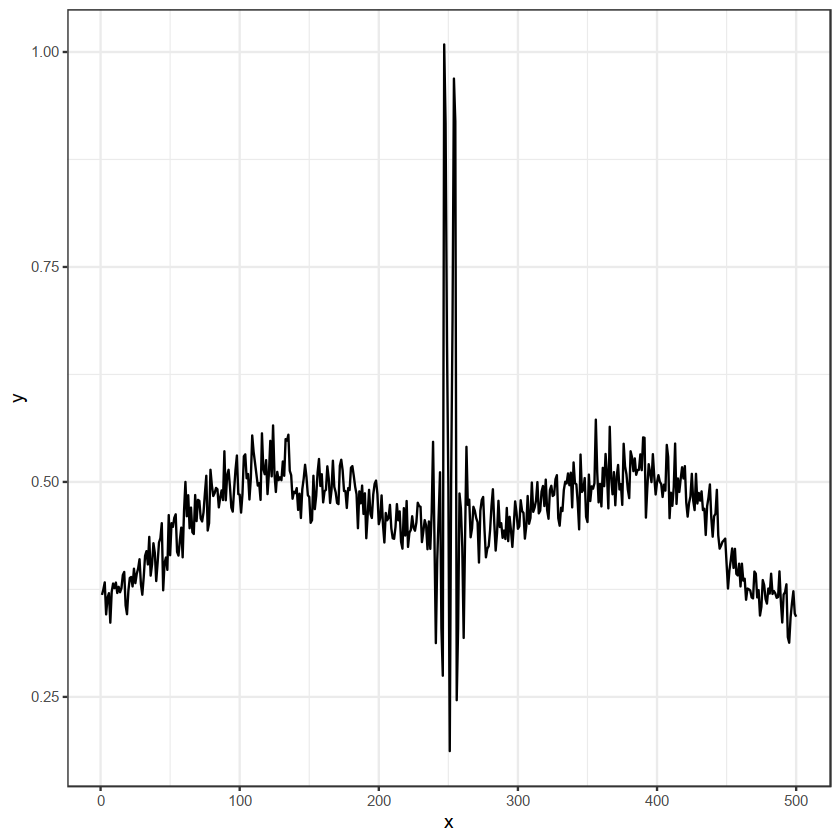

In [92]:
ggplot(data.frame(x=seq(500), 
                  y=colMeans(zeb_insertions_smc_kd))) +
geom_line(aes(x=x,y=y)) +
theme_bw()

In [73]:
left_zeb = rowSums(zeb_insertions[,1:250])
right_zeb = rowSums(zeb_insertions[,250:500])

In [74]:
zeb_corrected = zeb_insertions
zeb_corrected[left_zeb>right_zeb, ] = zeb_corrected[left_zeb>right_zeb, rev(seq(500))]

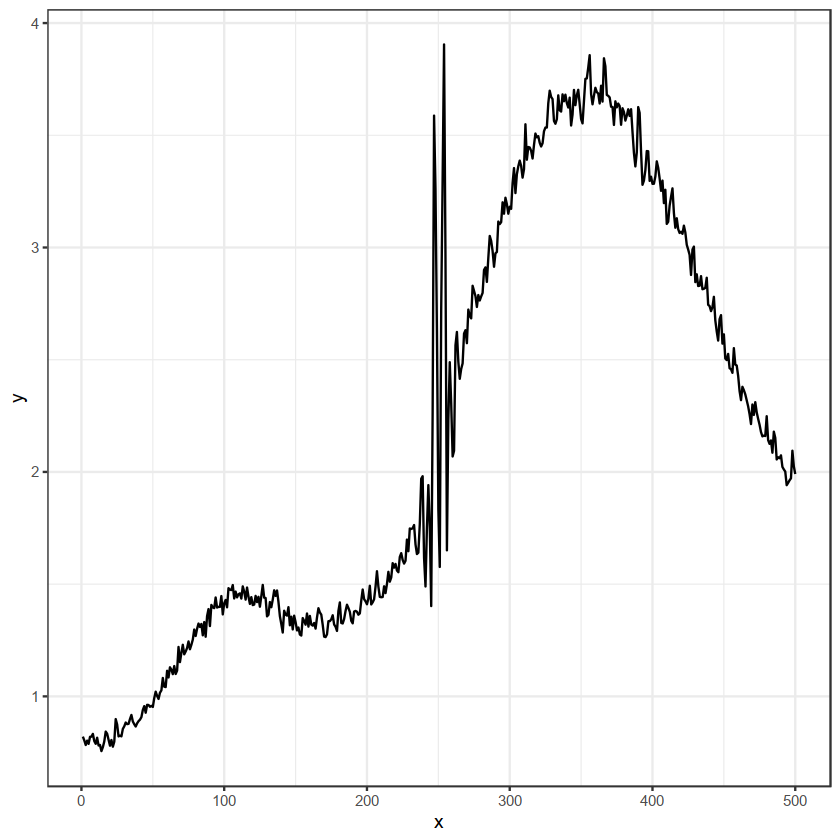

In [75]:
ggplot(data.frame(x=seq(500), 
                  y=colMeans(zeb_corrected))) +
geom_line(aes(x=x,y=y)) +
theme_bw()

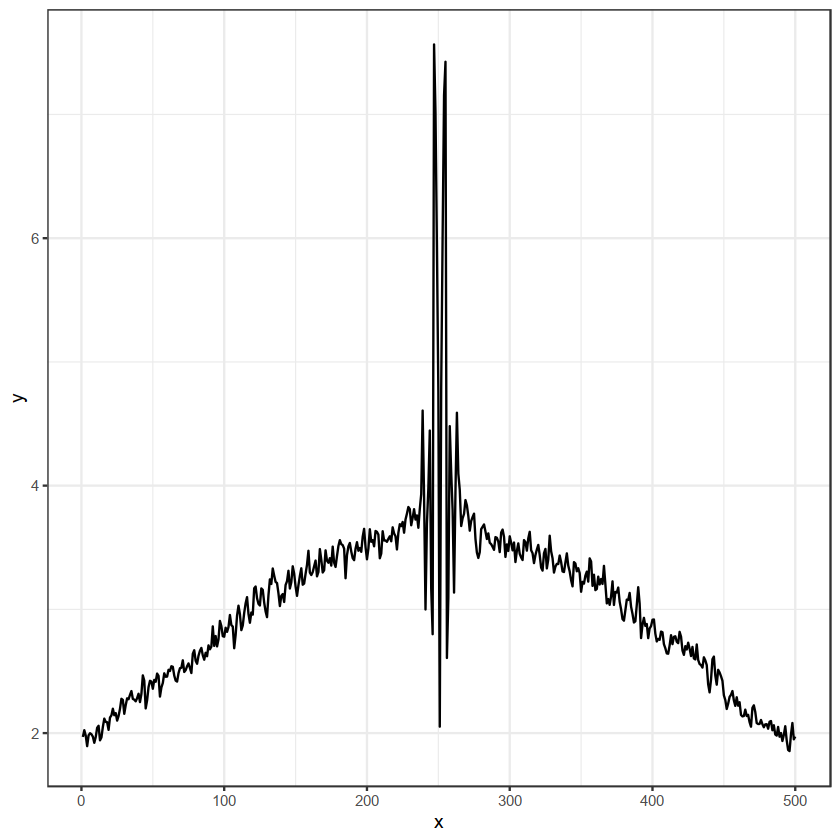

In [96]:
ggplot(data.frame(x=seq(500), 
                  y=colMeans(zeb_insertions_ipsc))) +
geom_line(aes(x=x,y=y)) +
theme_bw()

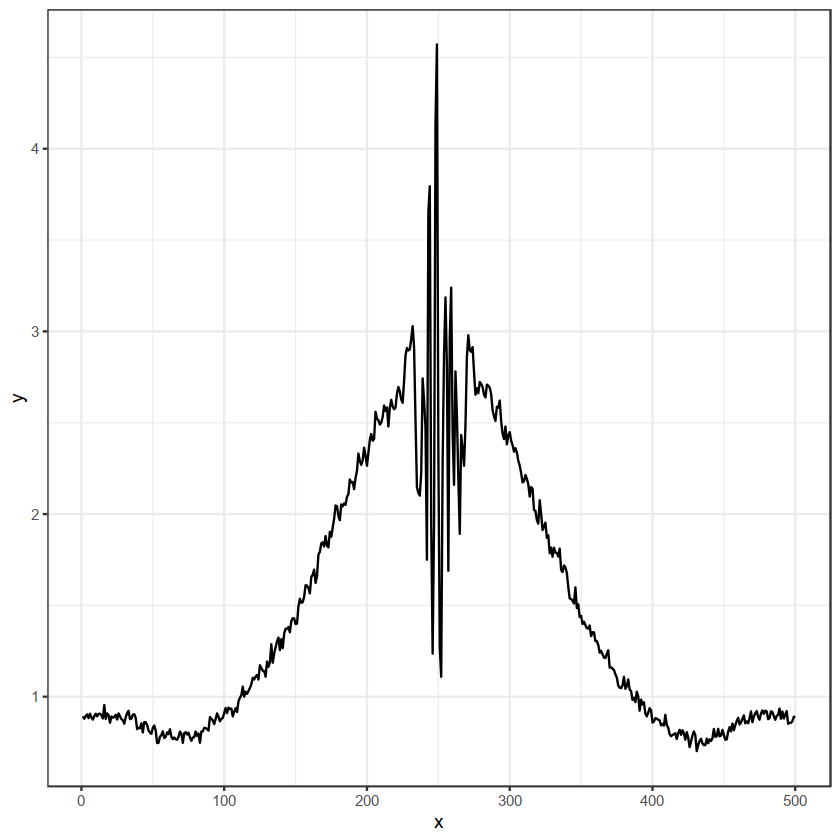

In [50]:
ggplot(data.frame(x=seq(500), 
                  y=colMeans(ap1_insertions))) +
geom_line(aes(x=x,y=y)) +
theme_bw()

In [76]:
left_ap1 = rowSums(ap1_insertions[,1:250])
right_ap1 = rowSums(ap1_insertions[,250:500])

In [77]:
ap1_corrected = ap1_insertions
ap1_corrected[left_ap1>right_ap1, ] = ap1_corrected[left_ap1>right_ap1, rev(seq(500))]

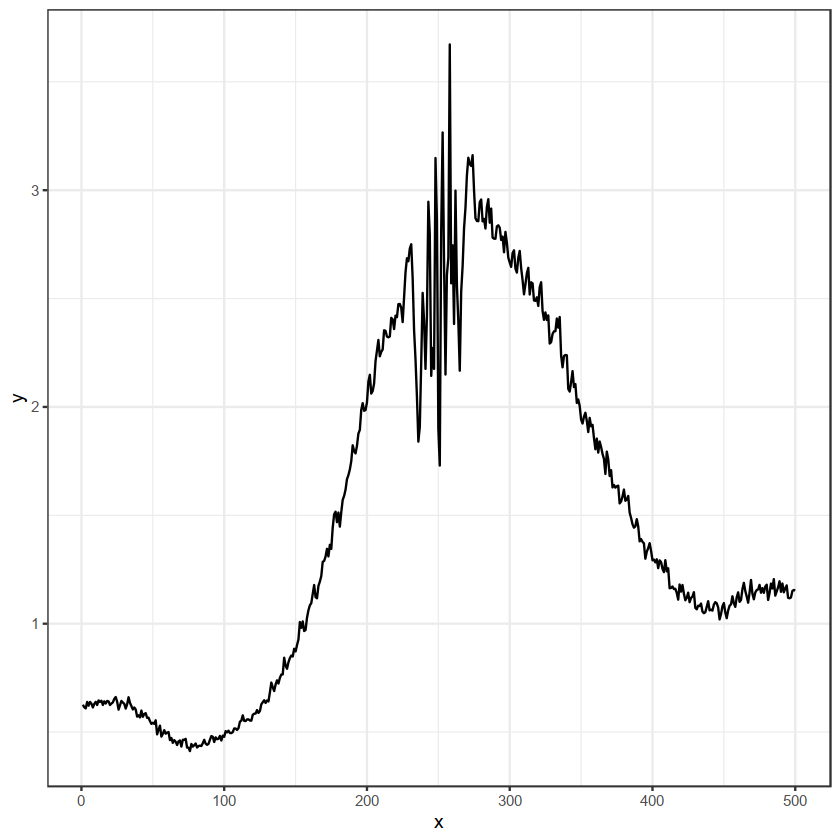

In [78]:
ggplot(data.frame(x=seq(500), 
                  y=colMeans(ap1_corrected))) +
geom_line(aes(x=x,y=y)) +
theme_bw()

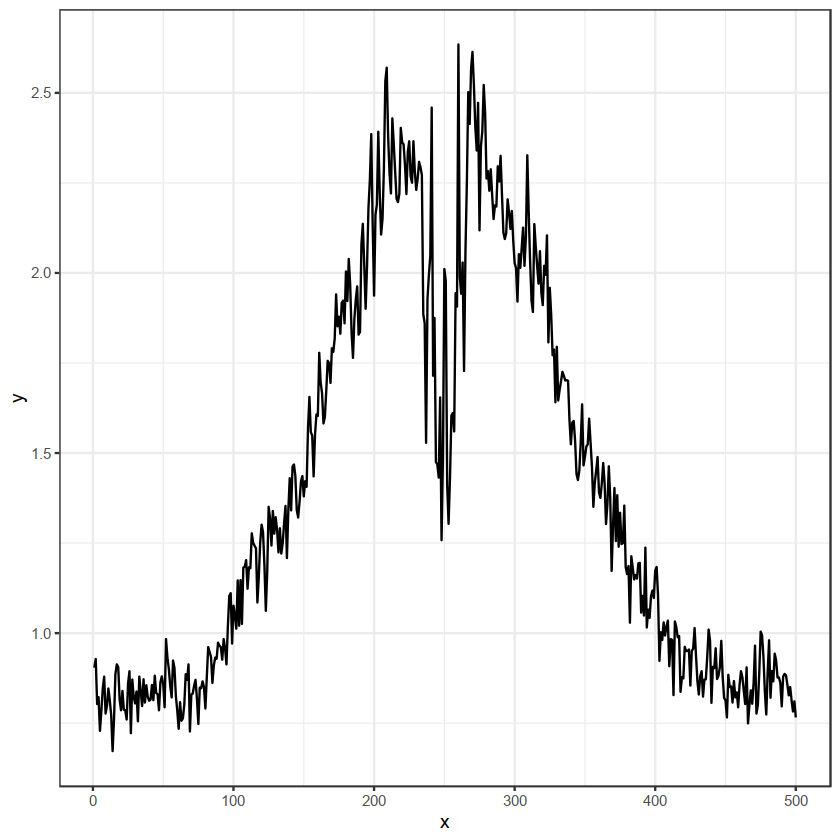

In [59]:
ggplot(data.frame(x=seq(500), 
                  y=colMeans(tead_insertions))) +
geom_line(aes(x=x,y=y)) +
theme_bw()